## File to Create Final Output Plots for quantitative and qualitative analyis

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

os.chdir("..")
print(os.getcwd())

/mnt/dlabscratch1/anmari/dit-editor


## IF LOADING FROM THE DATA PLAYGROUND NOTEBOOK

In [48]:
# load scores
scores = pd.read_csv('scores_testing.csv')
scores

,image_index,model_type,category,hpsv2_score,hpsv2_score_fg,aesthetics_score,aesthetics_score_fg,background_mse,clip_text_image,clip_fg_image,dinov2_similarity,lpips
0,0,Photoshop,Real-Cartoon,0.366406,0.367031,5.149572,4.426442,0.000695,0.351008,0.664666,0.265576,0.865315
1,0,TF-ICON,Real-Cartoon,0.429649,0.413644,5.852400,4.880501,0.007479,0.349948,0.666056,0.169509,0.870024
2,0,KV-EDIT,Real-Cartoon,0.399212,0.384817,5.848477,4.966319,0.000416,0.354293,0.678362,0.185860,0.873787
3,0,testing,Real-Cartoon,0.392956,0.375894,5.654108,5.001628,0.001793,0.347381,0.660165,0.266646,0.866992
4,1,Photoshop,Real-Cartoon,0.356176,0.369798,5.103274,4.392820,0.000681,0.314153,0.638970,0.209002,0.916524
...,...,...,...,...,...,...,...,...,...,...,...,...
1283,328,testing,Real-Sketch,0.307036,0.320865,5.337284,5.224784,0.007237,0.263003,0.727076,0.264584,0.849076
1284,329,Photoshop,Real-Sketch,0.264636,0.273424,5.778592,4.660750,0.000409,0.210331,0.678269,0.338222,0.810838
1285,329,TF-ICON,Real-Sketch,0.306509,0.340981,5.724440,4.426951,0.007882,0.235049,0.535150,0.305903,0.811514
1286,329,KV-EDIT,Real-Sketch,0.265288,0.279001,5.618990,4.532878,0.000856,0.179239,0.571099,0.276865,0.809161


In [49]:
scores_flat = pd.melt(scores, id_vars=['model_type', 'image_index', "category"], 
                      var_name='metric', 
                      value_name='value')
scores_flat

,model_type,image_index,category,metric,value
0,Photoshop,0,Real-Cartoon,hpsv2_score,0.366406
1,TF-ICON,0,Real-Cartoon,hpsv2_score,0.429649
2,KV-EDIT,0,Real-Cartoon,hpsv2_score,0.399212
3,testing,0,Real-Cartoon,hpsv2_score,0.392956
4,Photoshop,1,Real-Cartoon,hpsv2_score,0.356176
...,...,...,...,...,...
11587,testing,328,Real-Sketch,lpips,0.849076
11588,Photoshop,329,Real-Sketch,lpips,0.810838
11589,TF-ICON,329,Real-Sketch,lpips,0.811514
11590,KV-EDIT,329,Real-Sketch,lpips,0.809161


## IF LOADING FROM THE RUN_AGGREGATE_METRICS

In [2]:
scores = pd.read_csv("aggregated_scores_.csv")
scores.columns = ['category', 'metric', 'Photoshop', 'TF-ICON', "KV-EDIT", "ours"]
display(scores)
scores_flat = pd.melt(scores, id_vars=['metric', 'category'],
                      var_name='model_type', 
                      value_name='value')
scores_flat

,category,metric,Photoshop,TF-ICON,KV-EDIT,ours
0,Real-Cartoon,hpsv2_score,0.366406,0.429649,0.399212,0.392956
1,Real-Cartoon,hpsv2_score,0.356176,0.369064,0.378744,0.376986
2,Real-Cartoon,hpsv2_score,0.364545,0.413795,0.412206,0.394260
3,Real-Cartoon,hpsv2_score,0.409982,0.413266,0.402319,0.417962
4,Real-Cartoon,hpsv2_score,0.339461,0.342188,0.393923,0.395858
...,...,...,...,...,...,...
1605,Real-Sketch,dinov2_similarity,0.225248,0.166524,0.141369,0.180264
1606,Real-Sketch,dinov2_similarity,0.187251,0.186769,0.094496,0.214039
1607,Real-Sketch,dinov2_similarity,0.304253,0.263741,0.069501,0.265468
1608,Real-Sketch,dinov2_similarity,0.249165,0.247386,0.130589,0.264584


,metric,category,model_type,value
0,hpsv2_score,Real-Cartoon,Photoshop,0.366406
1,hpsv2_score,Real-Cartoon,Photoshop,0.356176
2,hpsv2_score,Real-Cartoon,Photoshop,0.364545
3,hpsv2_score,Real-Cartoon,Photoshop,0.409982
4,hpsv2_score,Real-Cartoon,Photoshop,0.339461
...,...,...,...,...
6435,dinov2_similarity,Real-Sketch,ours,0.180264
6436,dinov2_similarity,Real-Sketch,ours,0.214039
6437,dinov2_similarity,Real-Sketch,ours,0.265468
6438,dinov2_similarity,Real-Sketch,ours,0.264584


## Latex / Plotting Formatting

In [40]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4

import matplotlib.font_manager as fm
print(sorted(fm.get_font_names()))
import matplotlib.pyplot as plt
import json
# Use LaTeX font for publication
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["cm10"],
    "font.size": 12,
})
plt.rc('text.latex', preamble=r'\usepackage{amsmath,bm}')
percent_formatter = plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x))

import matplotlib.pyplot as plt

# # Global settings for LaTeX-like fonts
plt.rcParams['text.usetex'] = True  # Disable full LaTeX rendering to avoid dependency issues
plt.rcParams['mathtext.fontset'] = 'cm'  # Use Computer Modern (LaTeX-like) fonts
plt.rcParams['font.family'] = 'serif'  # Set overall font to serif (LaTeX-style)
# Set the color for axes edges (spines)
plt.rcParams['axes.edgecolor'] = 'darkgray'
# Enable the grid for the y-axis only
plt.rcParams['axes.grid'] = False  # Enable grid
plt.rcParams['grid.linestyle'] = '--'  # Optional: Set grid line style
plt.rcParams['grid.color'] = 'lightgray'  # Optional: Set grid line color
# # Disable LaTeX rendering to avoid dependency issues
plt.rcParams['text.usetex'] = False
# # Use 'DejaVu Serif' or another font that's available on your system
# # plt.rcParams['font.family'] = 'serif'
# # plt.rcParams['font.family'] = 'cmr10'
# # plt.rcParams['font.family'] = 'cmss10'
# # plt.rcParams['formatter.use_mathtext'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

['DejaVu Sans', 'DejaVu Sans Display', 'DejaVu Sans Mono', 'DejaVu Serif', 'DejaVu Serif Display', 'STIXGeneral', 'STIXNonUnicode', 'STIXSizeFiveSym', 'STIXSizeFourSym', 'STIXSizeOneSym', 'STIXSizeThreeSym', 'STIXSizeTwoSym', 'cmb10', 'cmex10', 'cmmi10', 'cmr10', 'cmss10', 'cmsy10', 'cmtt10']


# Aggregated analyis
Metrics aggregated over all image / task categories

Print out Mean + std table

In [50]:
from scipy import stats

# create mean and std table for metrics across model_types with statistical significance
def create_mean_std_table(scores_flat, group_by=['metric', "model_type", 'category']):
    mean_std_table = scores_flat.groupby(group_by).agg(
        mean=('value', 'mean'),
        std=('value', 'std'),
        std_err=('value', 'sem'),
    ).reset_index()
    return mean_std_table

mean_std_table = create_mean_std_table(scores_flat, group_by=['metric', "model_type"])

# Add statistical significance testing

# Create a new dataframe to store significance results
significance_results = []

for metric in scores_flat['metric'].unique():
    # Get data for Photoshop and TF-ICON for this metric
    photoshop_data = scores_flat[(scores_flat['metric'] == metric) & 
                                 (scores_flat['model_type'] == 'TF-ICON')]['value']
    tficon_data = scores_flat[(scores_flat['metric'] == metric) & 
                              (scores_flat['model_type'] == 'testing')]['value']
    
    # Perform t-test
    t_stat, p_value = stats.ttest_ind(photoshop_data, tficon_data, equal_var=False)
    
    # Determine if difference is significant (p < 0.05)
    is_significant = p_value < 0.05
    
    # Add to results
    significance_results.append({
        'metric': metric,
        'p_value': p_value,
        'is_significant': is_significant
    })

# Convert to DataFrame
significance_df = pd.DataFrame(significance_results)

# Display the original mean_std_table
display(mean_std_table)

# Display significance results
print("\nStatistical Significance (p < 0.05):")
significance_df.sort_values('metric')

,metric,model_type,mean,std,std_err
0,aesthetics_score,KV-EDIT,5.254556,0.511538,0.028507
1,aesthetics_score,Photoshop,5.207441,0.373897,0.020836
2,aesthetics_score,TF-ICON,5.660486,0.404525,0.022543
3,aesthetics_score,testing,5.441465,0.439947,0.024517
4,aesthetics_score_fg,KV-EDIT,4.785701,0.471716,0.026288
5,aesthetics_score_fg,Photoshop,4.696075,0.408657,0.022774
6,aesthetics_score_fg,TF-ICON,5.063624,0.455580,0.025389
7,aesthetics_score_fg,testing,4.907893,0.458964,0.025577
8,background_mse,KV-EDIT,0.002333,0.002260,0.000126
9,background_mse,Photoshop,0.001043,0.000669,0.000037



Statistical Significance (p < 0.05):


,metric,p_value,is_significant
2,aesthetics_score,1.007098e-10,True
3,aesthetics_score_fg,1.797527e-05,True
4,background_mse,6.736940e-29,True
6,clip_fg_image,5.875264e-01,False
5,clip_text_image,1.892031e-01,False
7,dinov2_similarity,9.128040e-01,False
0,hpsv2_score,1.488369e-03,True
1,hpsv2_score_fg,1.487516e-01,False
8,lpips,5.271654e-01,False


Plot Metrics for all our model types

/tmp/ipykernel_11708/1406174100.py:1: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=scores_flat, x='metric', y='value', hue='model_type',


<Axes: xlabel='metric', ylabel='value'>

findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: 

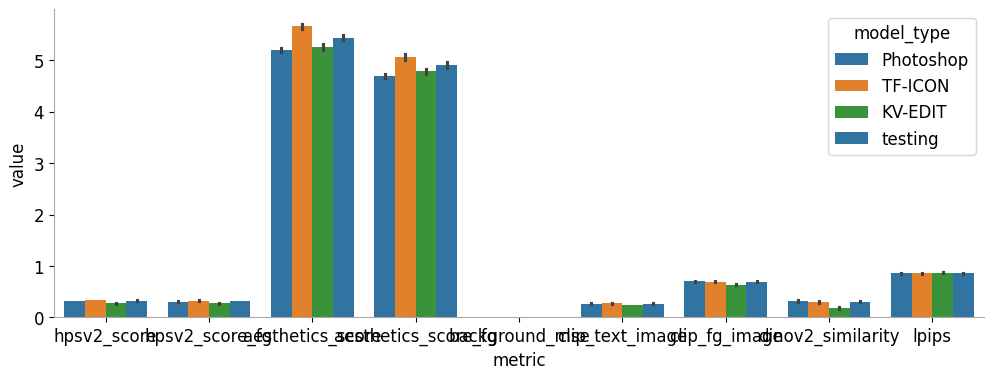

In [51]:
sns.barplot(data=scores_flat, x='metric', y='value', hue='model_type',
            palette=['#1f77b4', '#ff7f0e', '#2ca02c'], dodge=True, linewidth=0.5)

Boxplot for each metric independently

findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: 

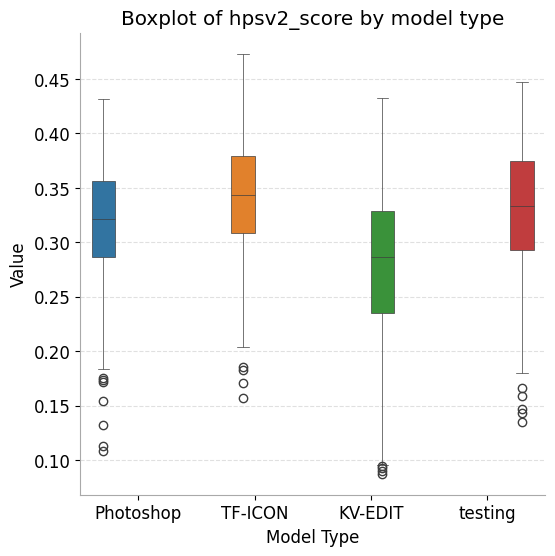

findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: 

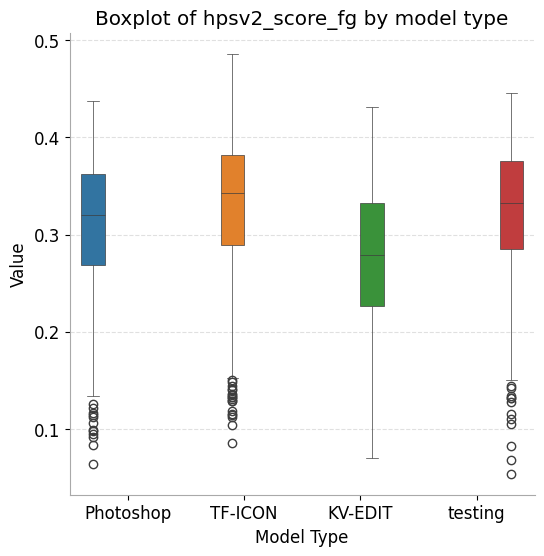

findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: 

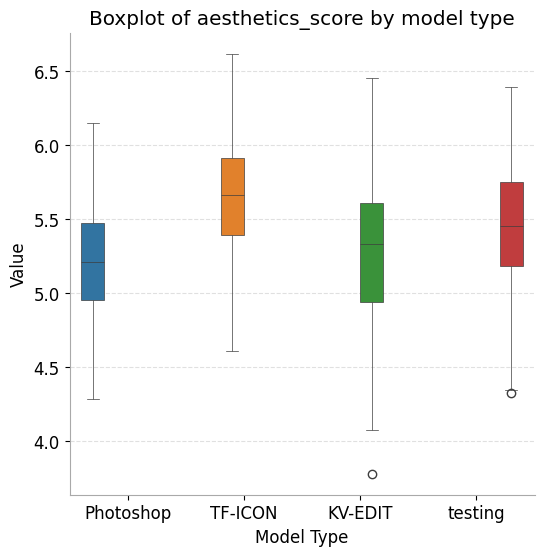

findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: 

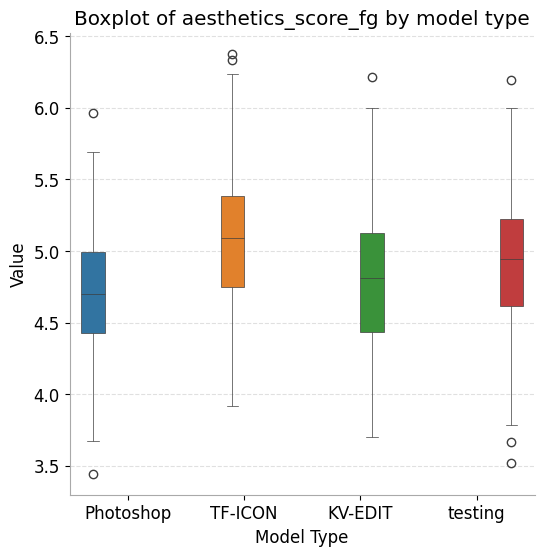

findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: 

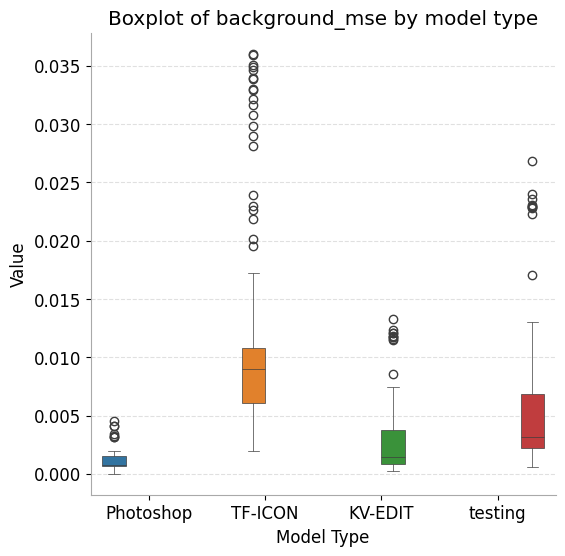

findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: 

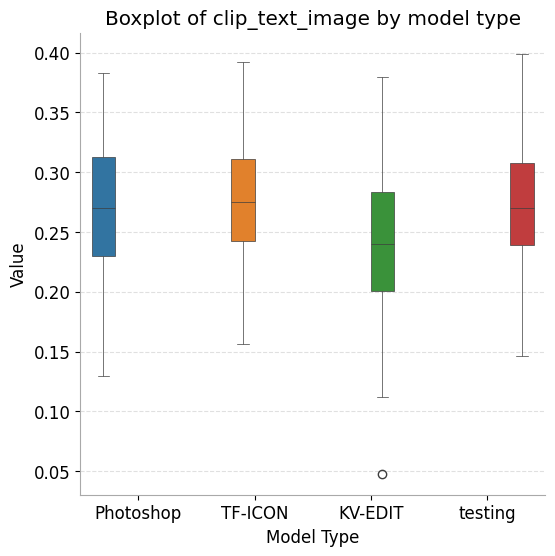

findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: 

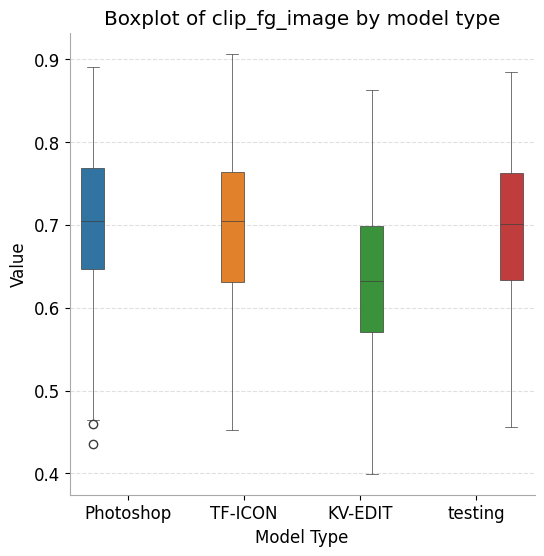

findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: 

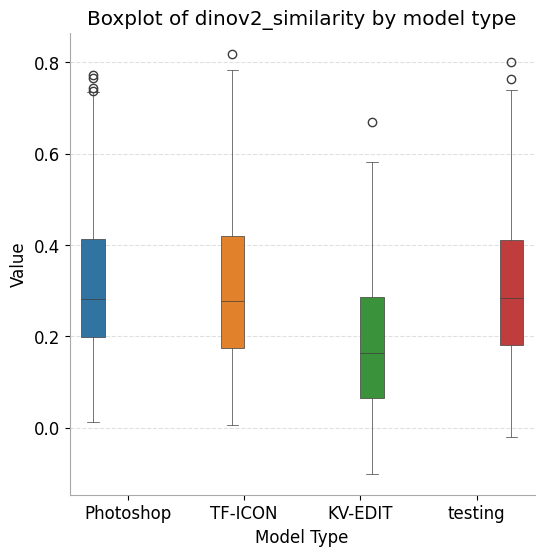

findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: 

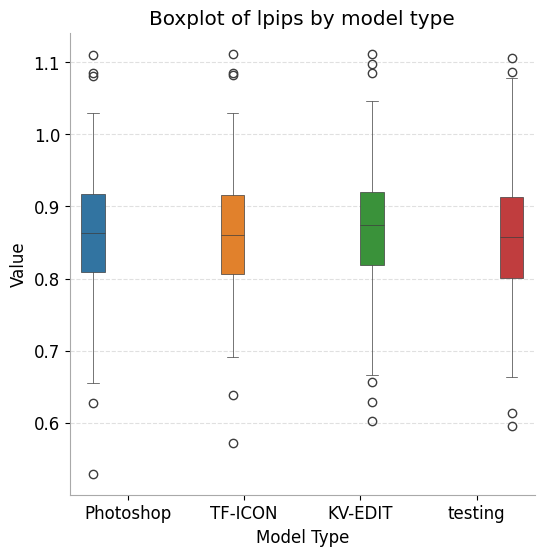

In [52]:
for metric in scores_flat['metric'].unique():
    plt.figure(figsize=(6, 6))
    sns.boxplot(data=scores_flat[scores_flat['metric'] == metric], x='model_type', 
                    y='value', hue='model_type',
                    dodge=True, linewidth=0.5)
    plt.title(f'Boxplot of {metric} by model type')
    plt.ylabel('Value')
    plt.xlabel('Model Type')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    # plt.savefig(f'boxplot_{metric}.pdf')
    plt.show()

Same as above but in one plot

findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: 

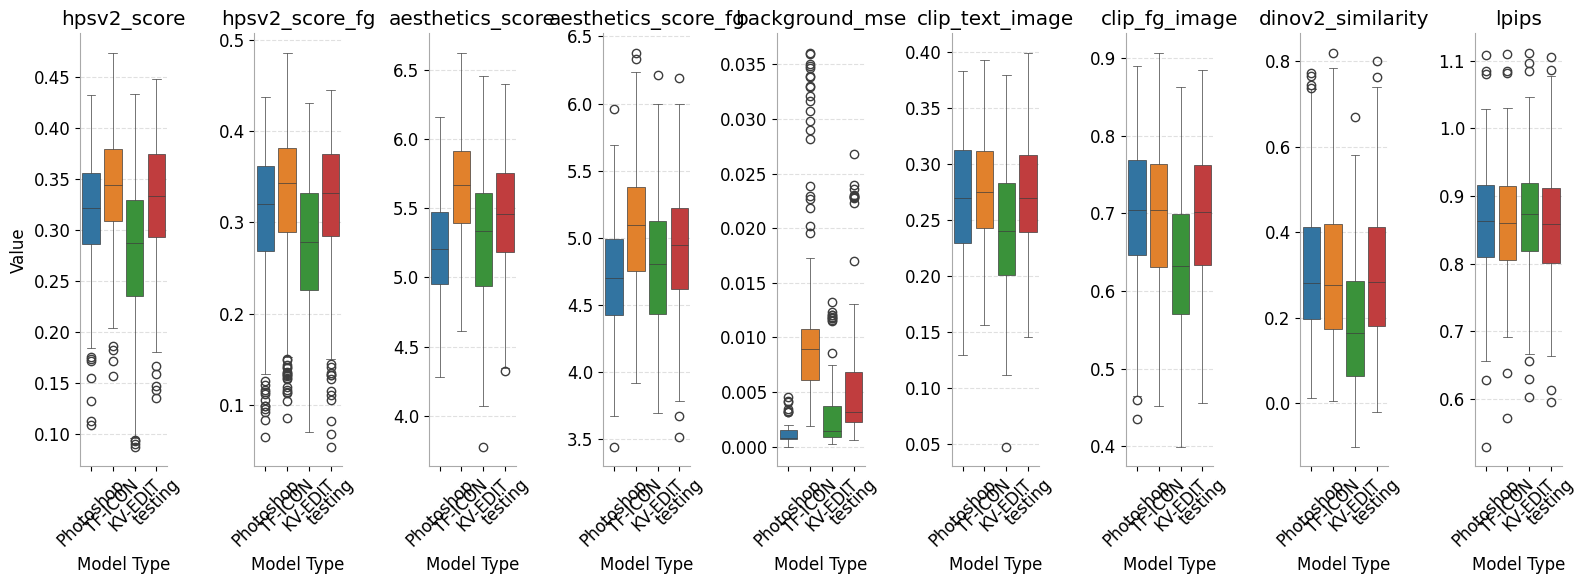

In [53]:
metrics = scores_flat['metric'].unique()
num_metrics = len(metrics)

fig, axes = plt.subplots(1, num_metrics, figsize=(16, 6), sharey=False)

for i, metric in enumerate(metrics):
    ax = axes[i]
    sns.boxplot(data=scores_flat[scores_flat['metric'] == metric], 
                x='model_type', y='value', 
                hue="model_type",
                ax=ax, linewidth=0.5)
    ax.set_title(f'{metric}')
    ax.set_ylabel('Value' if i == 0 else '')
    ax.set_xlabel('Model Type')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Rotate the x-axis labels if needed
    ax.tick_params(axis='x', rotation=45)
    
plt.tight_layout()
# plt.savefig('all_metrics_boxplot.pdf', bbox_inches='tight')
plt.show()

## Disaggregated analysis across categories

Grouped table

In [54]:
mean_std_table = create_mean_std_table(scores_flat, group_by=['metric', "model_type", "category"])
mean_std_table

,metric,model_type,category,mean,std,std_err
0,aesthetics_score,KV-EDIT,Real-Cartoon,5.616305,0.336958,0.064848
1,aesthetics_score,KV-EDIT,Real-Painting,5.729034,0.306065,0.051011
2,aesthetics_score,KV-EDIT,Real-Real,5.113362,0.506144,0.033520
3,aesthetics_score,KV-EDIT,Real-Sketch,5.426935,0.289142,0.051931
4,aesthetics_score,Photoshop,Real-Cartoon,5.411798,0.326947,0.062921
...,...,...,...,...,...,...
139,lpips,TF-ICON,Real-Sketch,0.880160,0.080181,0.014401
140,lpips,testing,Real-Cartoon,0.877223,0.068546,0.013192
141,lpips,testing,Real-Painting,0.845274,0.083998,0.014000
142,lpips,testing,Real-Real,0.853271,0.084170,0.005574


Display as tables


In [62]:
def create_performance_tables(mean_std_table: pd.DataFrame):
    """
    Create formatted tables of model performance for each category.
    
    Parameters:
    -----------
    mean_std_table : pandas.DataFrame
        DataFrame containing 'metric', 'model_type', 'category', 'mean', and 'std' columns
    """
    # Remove the model_type 'Photoshop' from the table
    mean_std_table = mean_std_table[mean_std_table['model_type'] != 'Photoshop']
    # Get unique categories and metrics
    categories = mean_std_table['category'].unique()
    metrics = sorted(mean_std_table['metric'].unique())
    model_types = sorted(mean_std_table['model_type'].unique())
    
    # Process each category
    for category in categories:
        # Create a DataFrame for this category with models as rows and metrics as columns
        category_data = mean_std_table[mean_std_table['category'] == category]
        
        # Initialize the result DataFrame
        result_df = pd.DataFrame(index=model_types, columns=metrics)
        
        # Fill the DataFrame with formatted mean ± std values
        for _, row in category_data.iterrows():
            metric = row['metric']
            model = row['model_type']
            mean_val = row['mean']
            std_err = row['std_err']
            
            # Format the values with 3 decimal places
            result_df.at[model, metric] = f"{mean_val:.3f} ± {std_err:.3f}"
        
        # Find best performing model for each metric
        best_models = {}
        for metric in metrics:
            metric_data = category_data[category_data['metric'] == metric]
            if metric in ['background_mse', 'lpips']:  # Lower is better for MSE
                best_model = metric_data.loc[metric_data['mean'].idxmin()]['model_type']
            else:  # Higher is better for other metrics
                best_model = metric_data.loc[metric_data['mean'].idxmax()]['model_type']
            best_models[metric] = best_model
        
        # Display the table with appropriate styling
        print(f"\n{'='*80}")
        print(f"Performance for category: {category}")
        print(f"{'='*80}")
        
        # Create a styled DataFrame with highlighting for the best model in each metric
        styled_df = result_df[["background_mse", "hpsv2_score_fg", "dinov2_similarity", "clip_text_image", "clip_fg_image", "lpips"]].copy()
        
        # Function to highlight the best model for each metric
        def highlight_best(df):
            styles = pd.DataFrame('', index=df.index, columns=df.columns)
            for metric in df.columns:
                if metric in best_models:
                    best_model = best_models[metric]
                    styles.loc[best_model, metric] = 'font-weight: bold; background-color: #e6f7e9'
            return styles
        
        # Apply styling and display the entire table
        display(styled_df.style.apply(highlight_best, axis=None))
        
        print(f"\n{'-'*80}")

# Call the function
create_performance_tables(mean_std_table)



Performance for category: Real-Cartoon


,background_mse,hpsv2_score_fg,dinov2_similarity,clip_text_image,clip_fg_image,lpips
KV-EDIT,0.001 ± 0.000,0.347 ± 0.008,0.211 ± 0.019,0.308 ± 0.007,0.629 ± 0.014,0.885 ± 0.013
TF-ICON,0.008 ± 0.001,0.360 ± 0.008,0.280 ± 0.025,0.308 ± 0.007,0.655 ± 0.016,0.877 ± 0.013
testing,0.002 ± 0.000,0.358 ± 0.008,0.318 ± 0.020,0.314 ± 0.006,0.659 ± 0.015,0.877 ± 0.013



--------------------------------------------------------------------------------

Performance for category: Real-Painting


,background_mse,hpsv2_score_fg,dinov2_similarity,clip_text_image,clip_fg_image,lpips
KV-EDIT,0.001 ± 0.000,0.301 ± 0.013,0.183 ± 0.026,0.258 ± 0.008,0.594 ± 0.012,0.852 ± 0.014
TF-ICON,0.013 ± 0.001,0.319 ± 0.012,0.257 ± 0.025,0.283 ± 0.007,0.623 ± 0.012,0.853 ± 0.013
testing,0.004 ± 0.000,0.319 ± 0.012,0.275 ± 0.026,0.281 ± 0.008,0.623 ± 0.014,0.845 ± 0.014



--------------------------------------------------------------------------------

Performance for category: Real-Real


,background_mse,hpsv2_score_fg,dinov2_similarity,clip_text_image,clip_fg_image,lpips
KV-EDIT,0.003 ± 0.000,0.261 ± 0.005,0.186 ± 0.011,0.225 ± 0.004,0.649 ± 0.006,0.869 ± 0.005
TF-ICON,0.009 ± 0.000,0.324 ± 0.005,0.334 ± 0.012,0.268 ± 0.003,0.721 ± 0.006,0.857 ± 0.005
testing,0.005 ± 0.000,0.309 ± 0.005,0.327 ± 0.012,0.260 ± 0.003,0.713 ± 0.006,0.853 ± 0.006



--------------------------------------------------------------------------------

Performance for category: Real-Sketch


,background_mse,hpsv2_score_fg,dinov2_similarity,clip_text_image,clip_fg_image,lpips
KV-EDIT,0.002 ± 0.000,0.291 ± 0.010,0.104 ± 0.018,0.261 ± 0.009,0.583 ± 0.012,0.886 ± 0.014
TF-ICON,0.009 ± 0.001,0.338 ± 0.010,0.204 ± 0.017,0.296 ± 0.007,0.644 ± 0.014,0.880 ± 0.014
testing,0.004 ± 0.000,0.358 ± 0.009,0.215 ± 0.019,0.300 ± 0.008,0.657 ± 0.014,0.876 ± 0.015



--------------------------------------------------------------------------------


display as barcharts with annotations

findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: 

findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: 

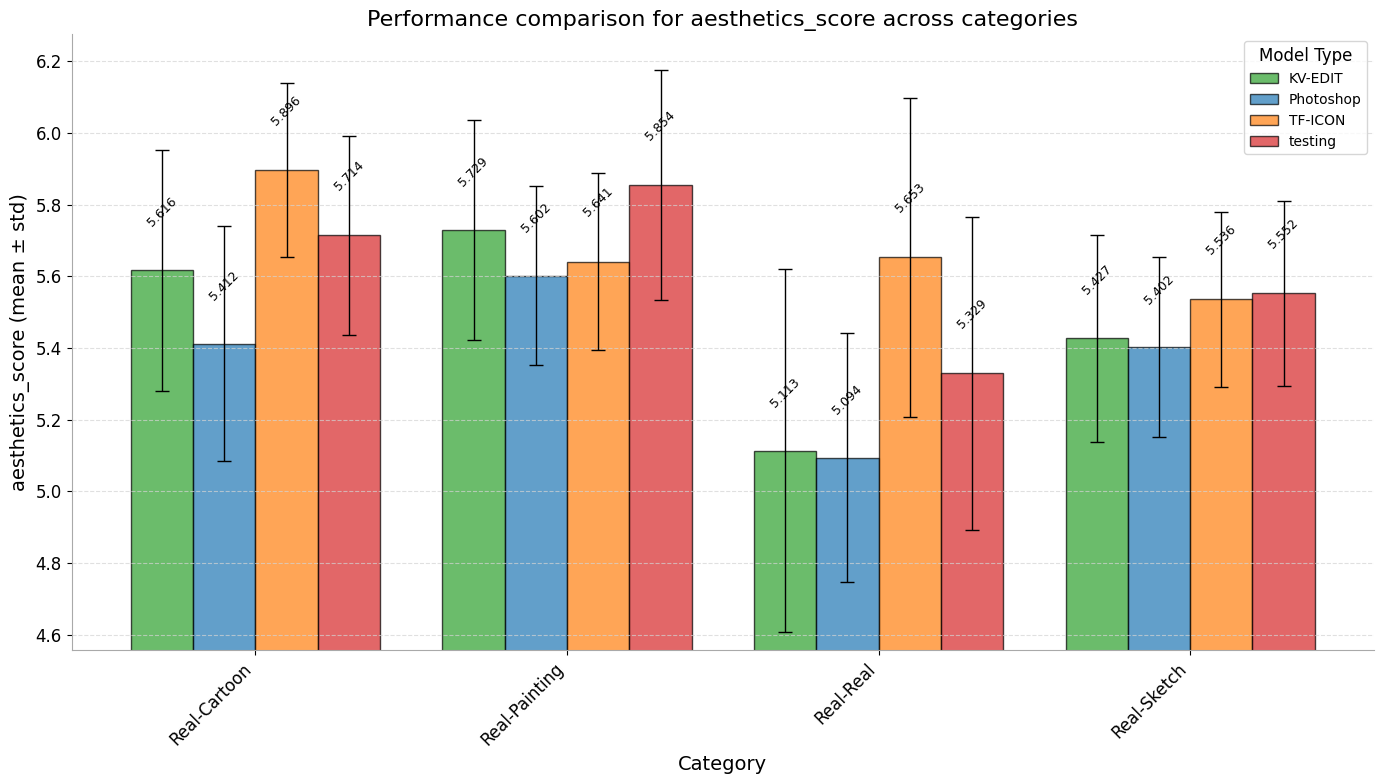

findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: 

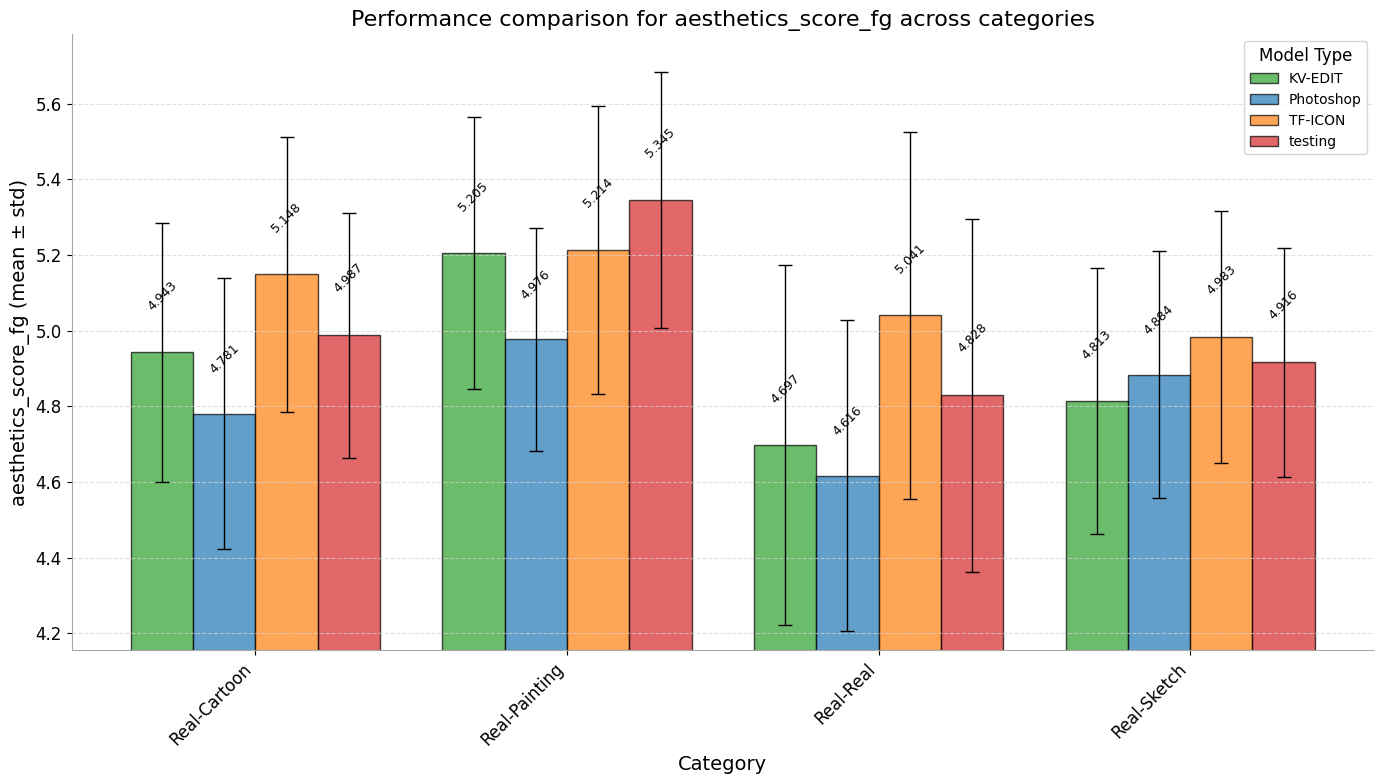

findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: 

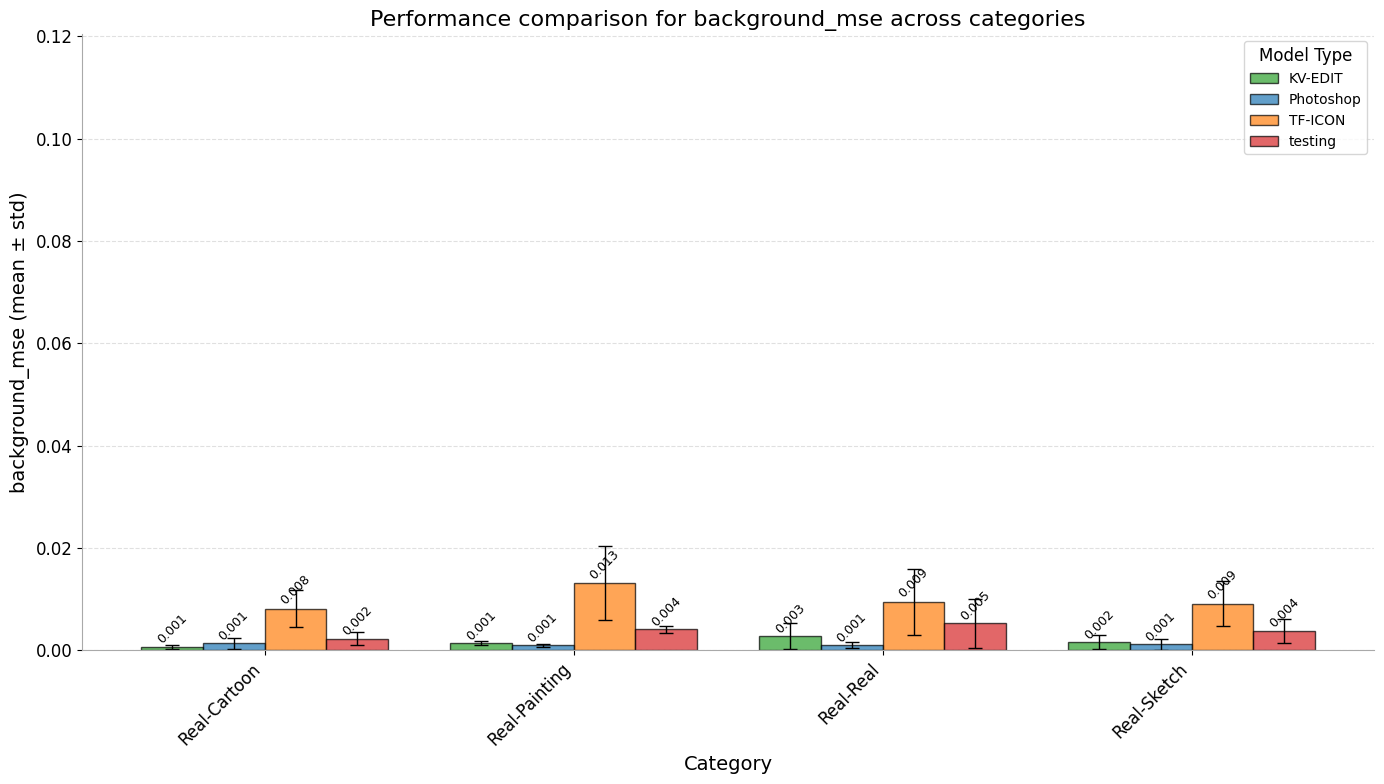

findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: 

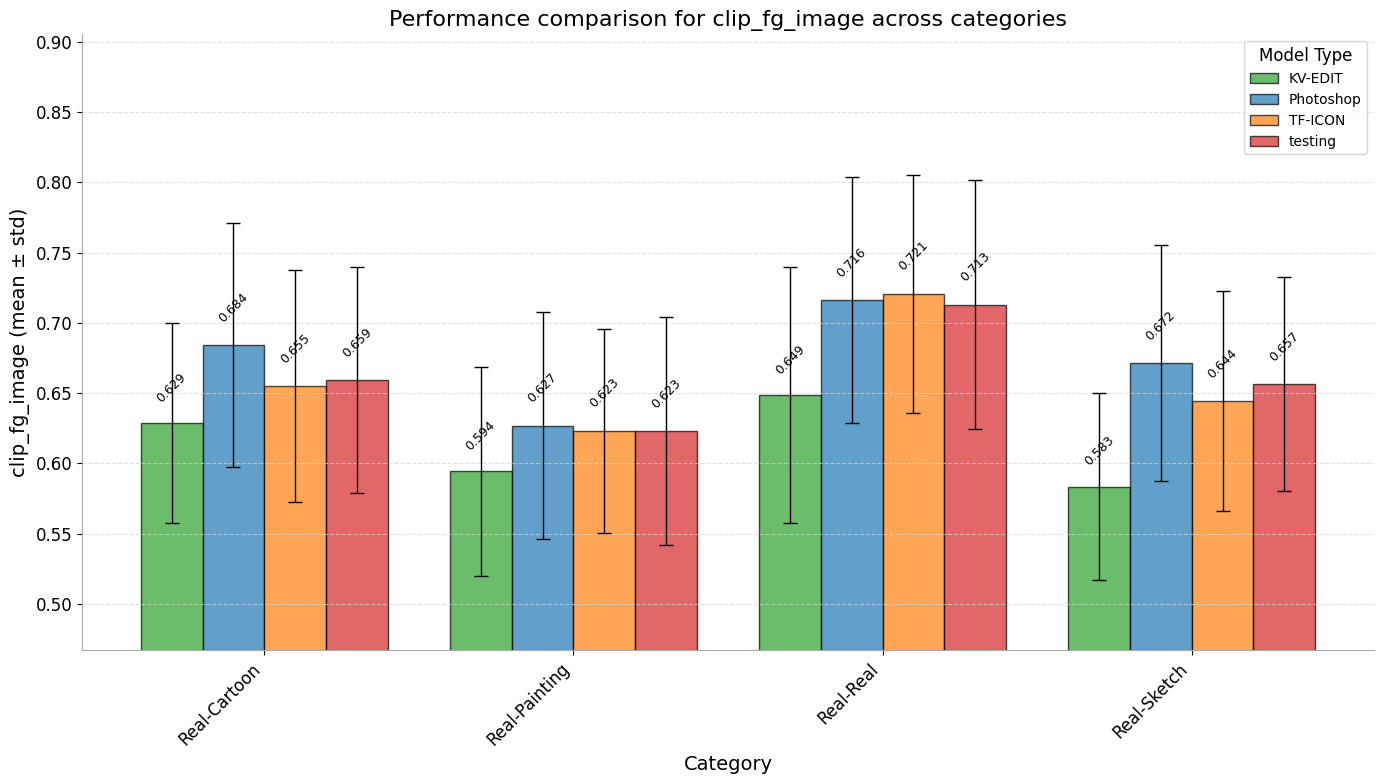

findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: 

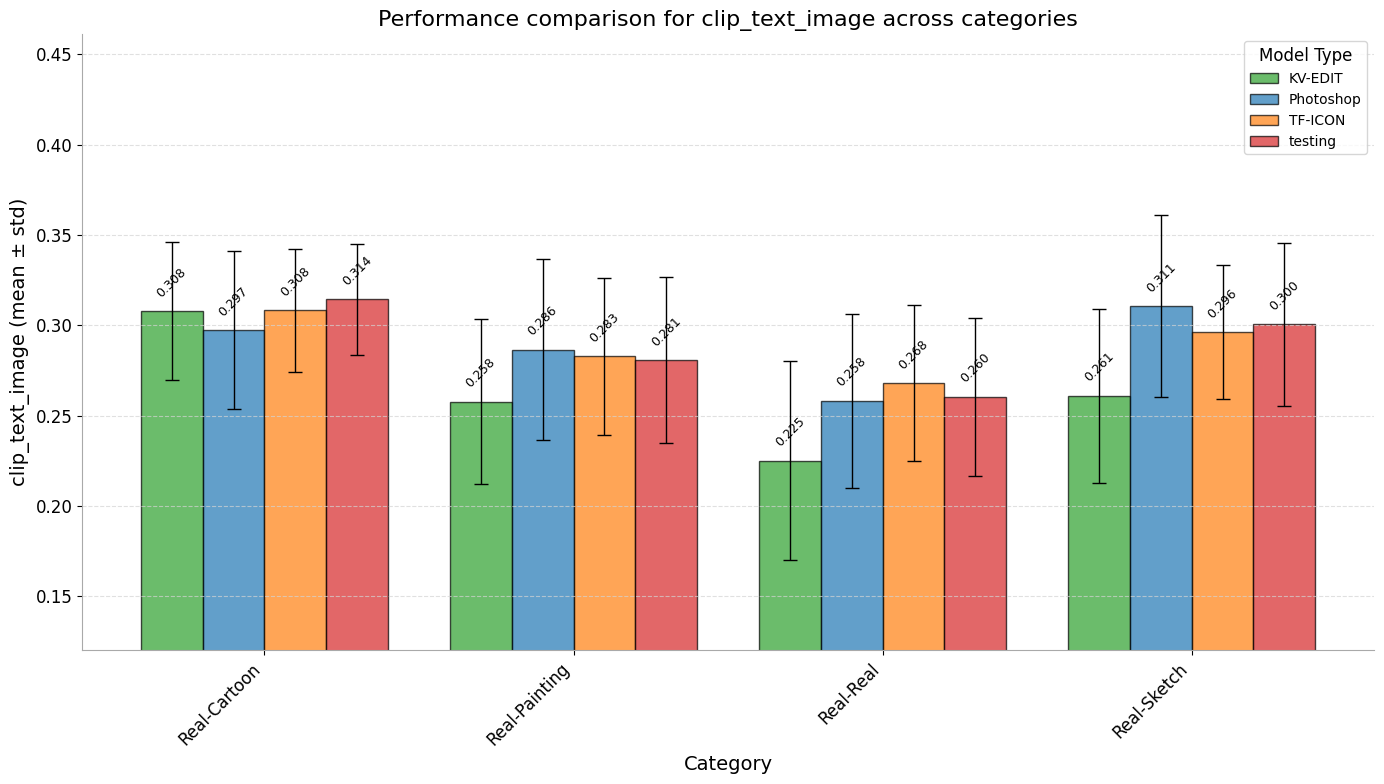

findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: 

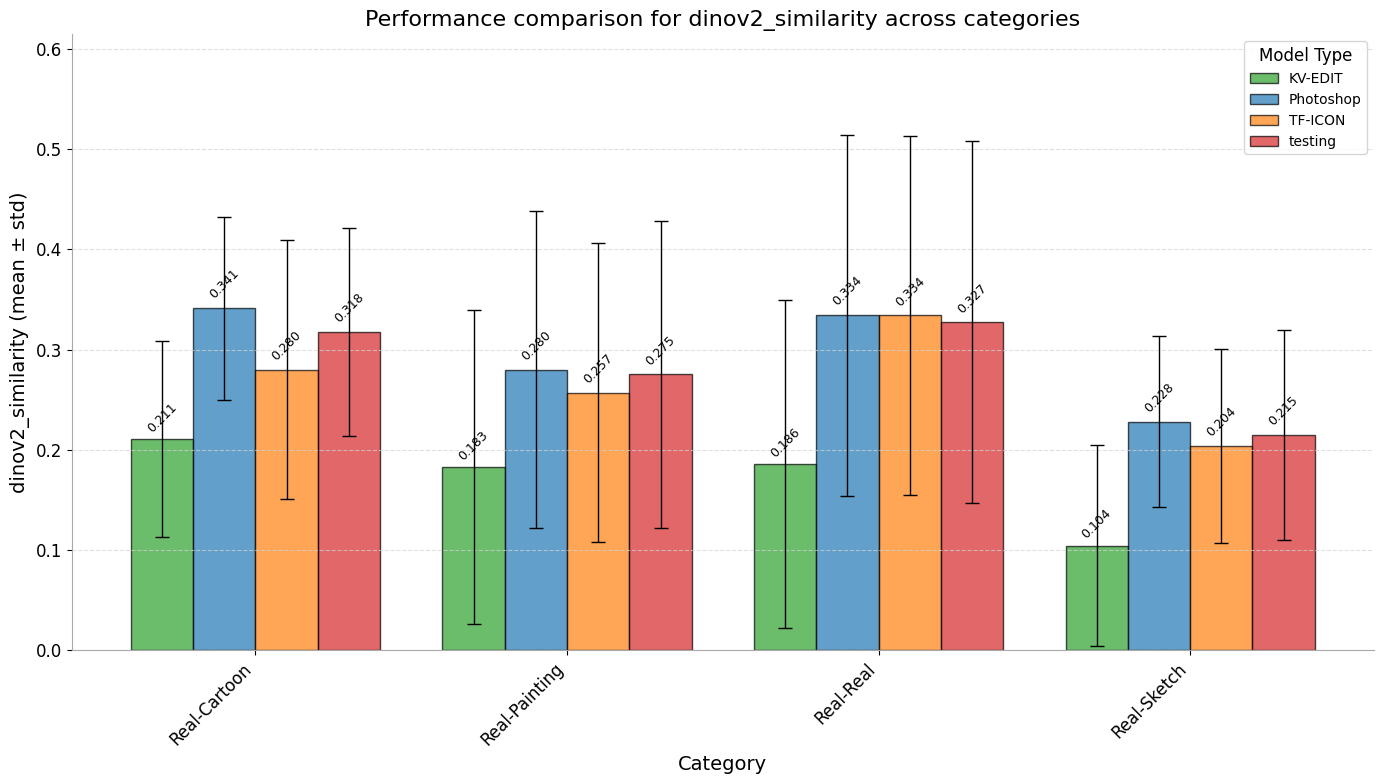

findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: 

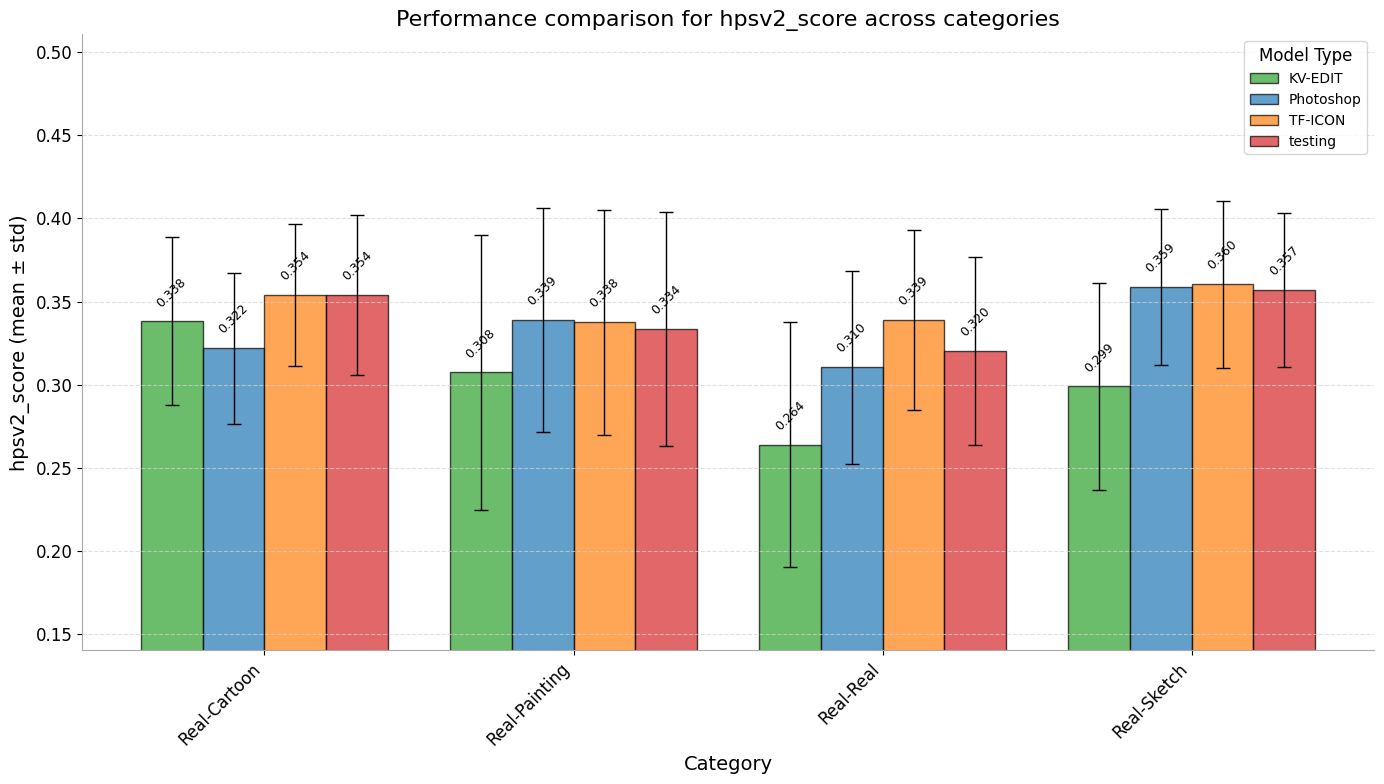

findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: 

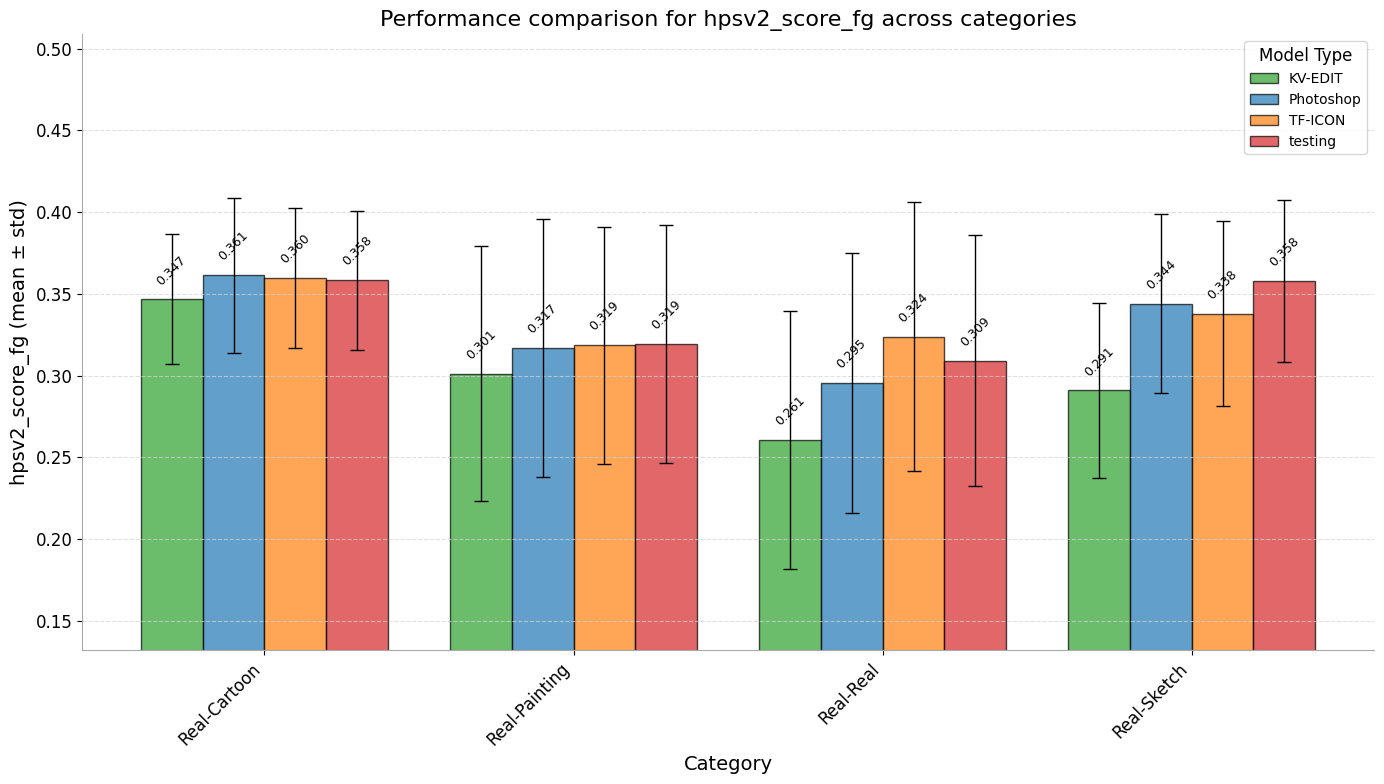

findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: 

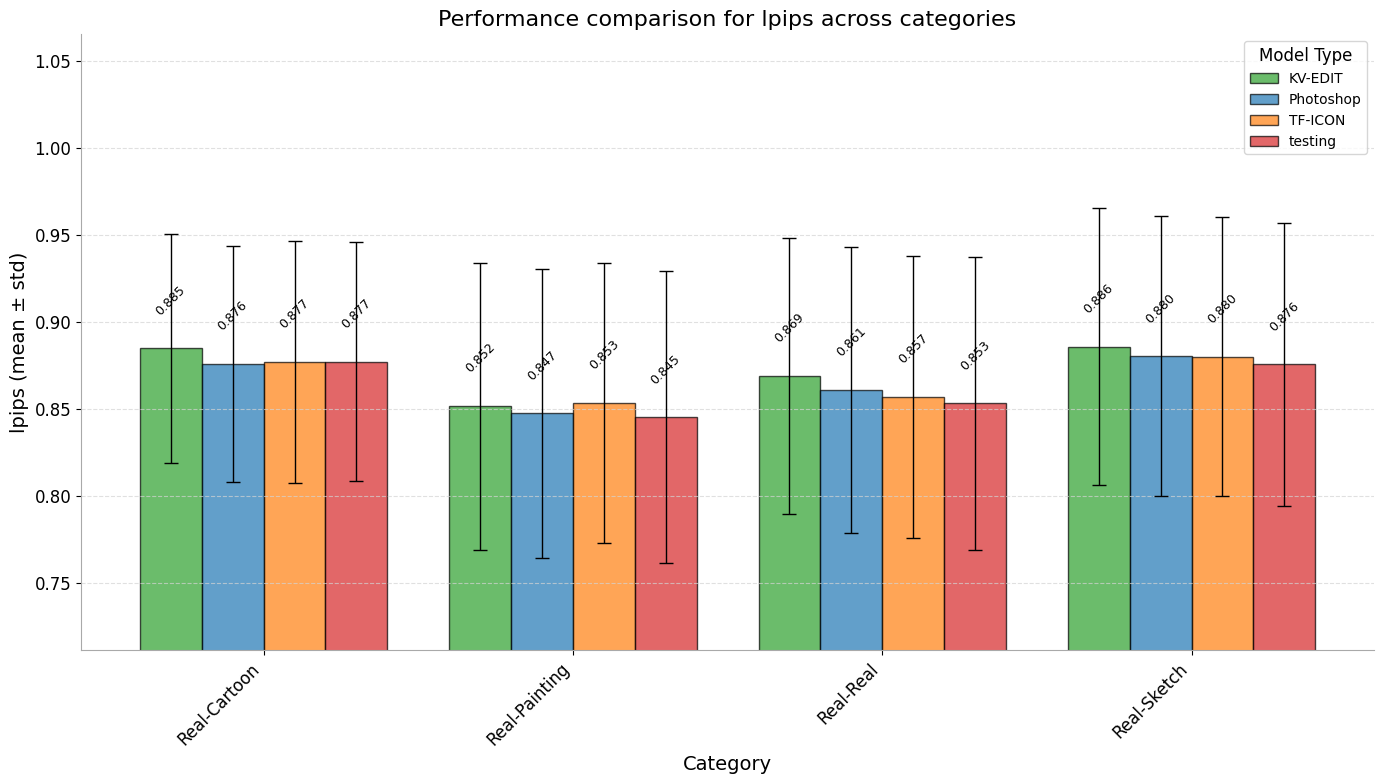

In [56]:
def plot_category_performance(mean_std_table, metric, figsize=(14, 8)):
    """
    Plot mean ± std performance for a specific metric across categories.
    
    Parameters:
    -----------
    mean_std_table : pandas.DataFrame
        DataFrame containing 'metric', 'model_type', 'category', 'mean', and 'std' columns
    metric : str
        The metric to plot
    figsize : tuple, optional
        Figure size in inches. Default is (14, 8)
    
    Returns:
    --------
    fig : matplotlib.figure.Figure
        The created figure
    """
    # Filter the data for the specified metric
    metric_data = mean_std_table[mean_std_table['metric'] == metric].copy()
    
    # Define model colors and markers for consistency
    model_styles = {
        'Photoshop': {'color': '#1f77b4', 'marker': 'o', 'label': 'Photoshop'},
        'TF-ICON': {'color': '#ff7f0e', 'marker': 's', 'label': 'TF-ICON'},
        'KV-EDIT': {'color': '#2ca02c', 'marker': '^', 'label': 'KV-EDIT'},
        'ours': {'color': '#d62728', 'marker': 'D', 'label': 'Ours'}
    }
    
    # Get all categories
    categories = metric_data['category'].unique()
    
    # Create the figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Set positions for the bars
    x = np.arange(len(categories))
    width = 0.2  # width of the bars
    offsets = [-1.5*width, -0.5*width, 0.5*width, 1.5*width]
    
    # Plot for each model type
    for i, model_type in enumerate(sorted(metric_data['model_type'].unique())):
        model_data = metric_data[metric_data['model_type'] == model_type]
        
        # For each category, find the corresponding mean and std
        means = []
        stds = []
        for category in categories:
            cat_data = model_data[model_data['category'] == category]
            if len(cat_data) > 0:
                means.append(cat_data['mean'].values[0])
                stds.append(cat_data['std'].values[0])
            else:
                means.append(0)
                stds.append(0)
        
        style = model_styles.get(model_type, {'color': f'C{i}', 'marker': 'o', 'label': model_type})
        
        # Plot bars with error bars
        bars = ax.bar(x + offsets[i], means, width, label=style['label'], 
                     color=style['color'], alpha=0.7, edgecolor='black', linewidth=1)
        
        # Add error bars
        ax.errorbar(x + offsets[i], means, yerr=stds, fmt='none', ecolor='black', 
                   capsize=5, capthick=1, elinewidth=1)
        
        # Add mean values on top of bars
        for j, (bar, mean) in enumerate(zip(bars, means)):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02*max(means),
                   f'{mean:.3f}', ha='center', va='bottom', fontsize=9, rotation=45)
    
    # Customize the plot
    ax.set_xlabel('Category', fontsize=14)
    ax.set_ylabel(f'{metric} (mean ± std)', fontsize=14)
    ax.set_title(f'Performance comparison for {metric} across categories', fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=45, ha='right')
    ax.legend(title='Model Type', title_fontsize=12, fontsize=10, loc='best')
    
    # Add grid for better readability
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Set y-axis to start at 0 or slightly below the minimum value if appropriate
    y_min = max(0, min([m-s for m,s in zip(metric_data['mean'], metric_data['std'])]) - 0.05)
    y_max = max([m+s for m,s in zip(metric_data['mean'], metric_data['std'])]) + 0.1
    ax.set_ylim(y_min, y_max)
    
    # Add a horizontal line at y=0 if the axis includes negative values
    if y_min < 0:
        ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    
    return fig

# Example usage for each metric
for metric in mean_std_table['metric'].unique():
    plot_category_performance(mean_std_table, metric)
    plt.show()

Barchart disaggregated

findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: 

findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: 

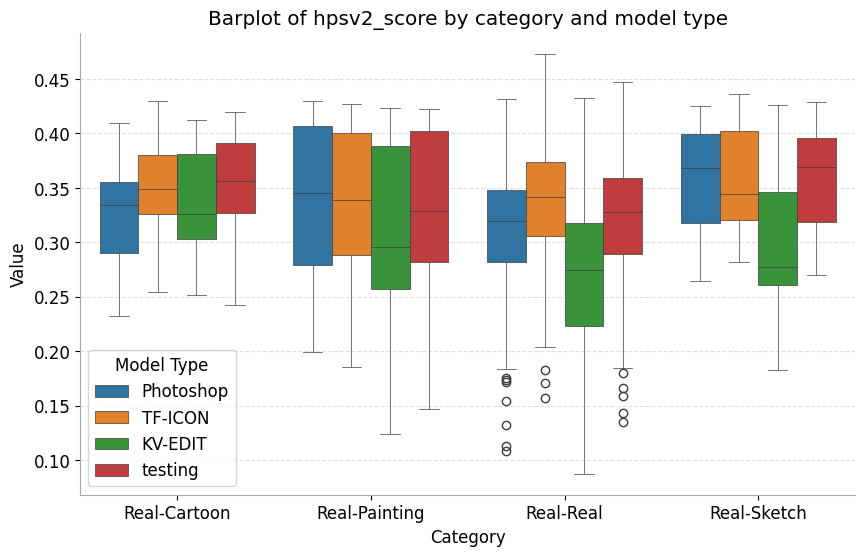

findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: 

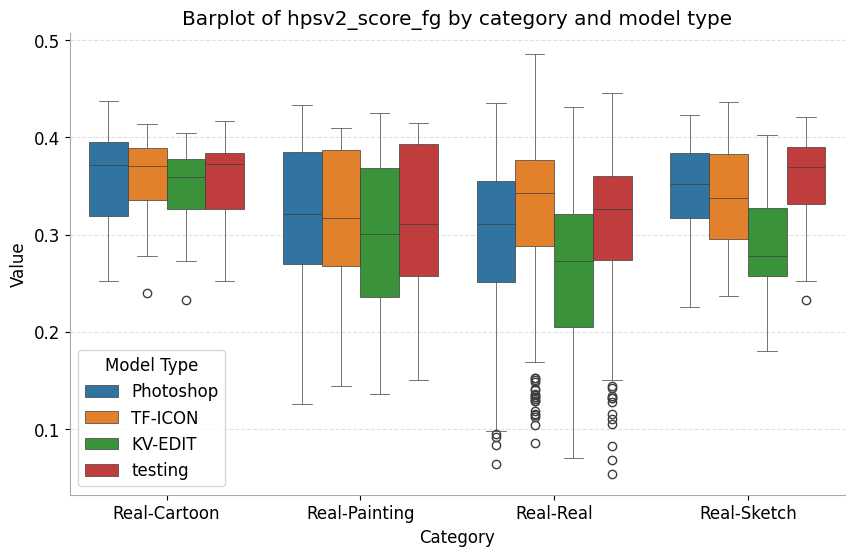

findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: 

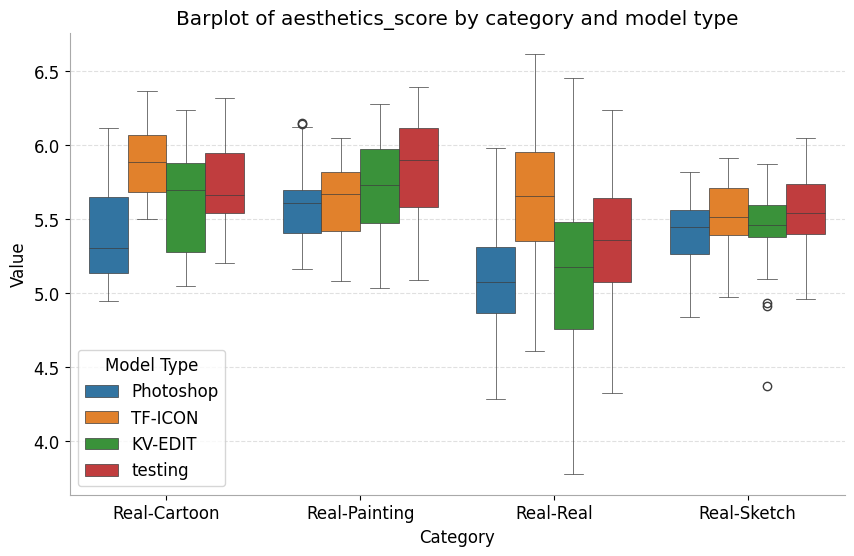

findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: 

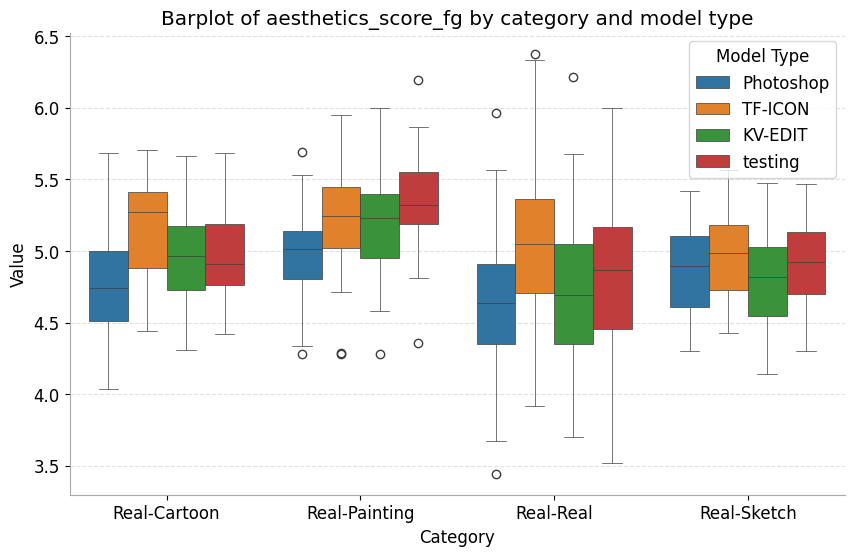

findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: 

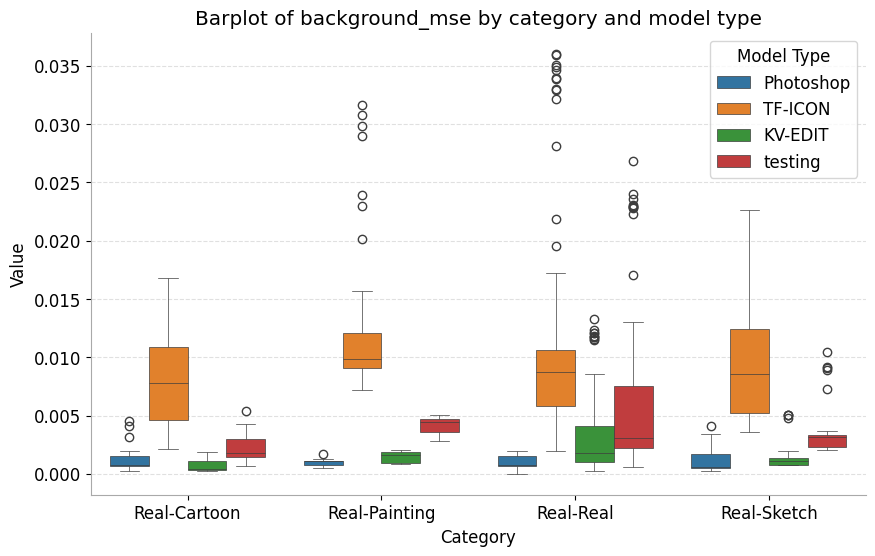

findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: 

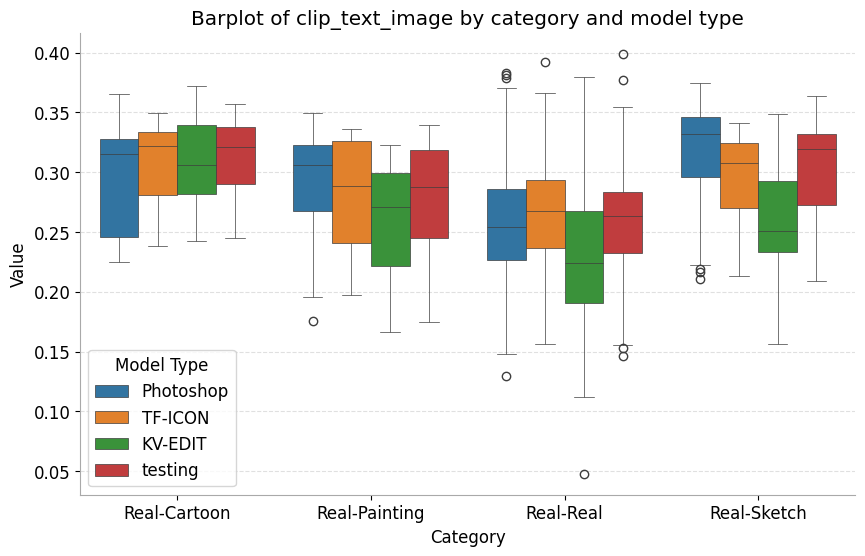

findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: 

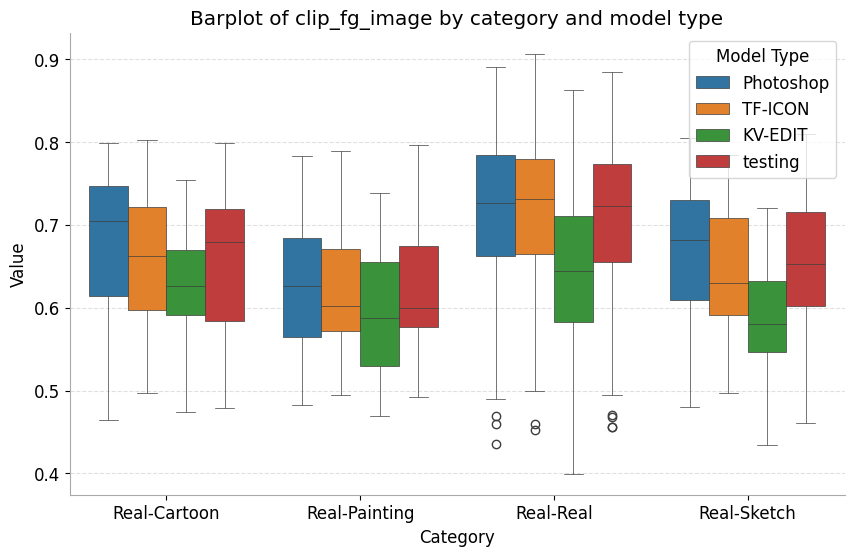

findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: 

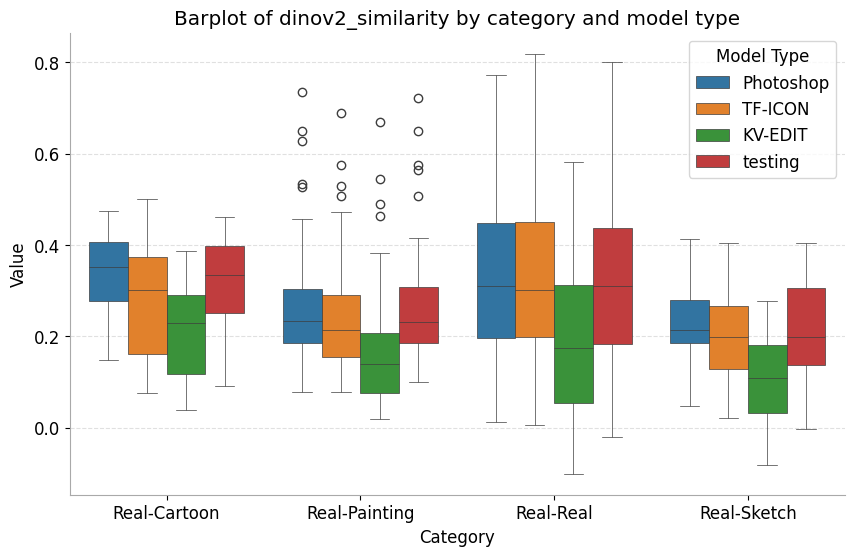

findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: 

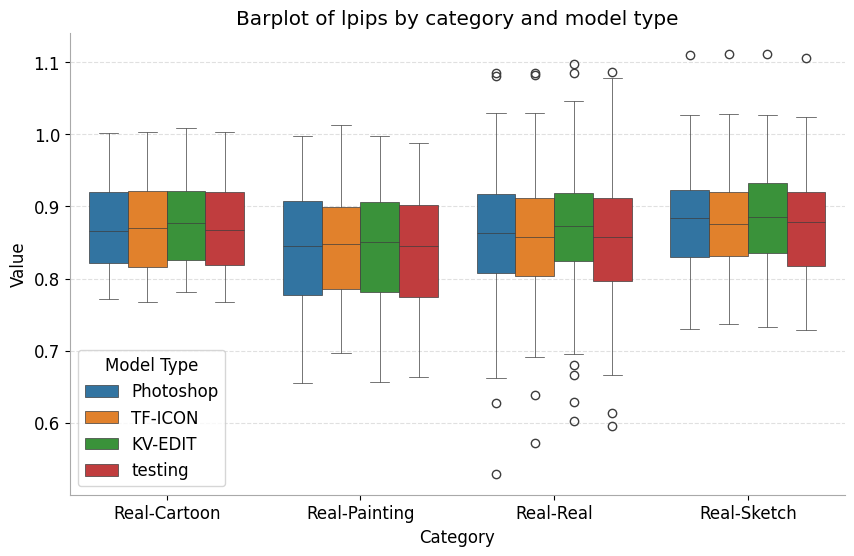

In [57]:
# make a barchart with hue=model_type, y = metric and x = category for each metric seperately

def plot_metric_chart(scores_flat, metric, type='boxplot'):
    plt.figure(figsize=(10, 6))
    if type == 'boxplot':
        sns.boxplot(data=scores_flat[scores_flat['metric'] == metric], 
                    x='category', y='value', hue='model_type',
                    dodge=True, linewidth=0.5)
    elif type == 'barplot':
        sns.barplot(data=scores_flat[scores_flat['metric'] == metric], 
                    x='category', y='value', hue='model_type',
                    dodge=True, linewidth=0.5)

    plt.title(f'Barplot of {metric} by category and model type')
    plt.ylabel('Value')
    plt.xlabel('Category')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Model Type')
    # plt.savefig(f'barchart_{metric}.pdf')
    plt.show()


# Plot each metric separately
for metric in scores_flat['metric'].unique():
    plot_metric_chart(scores_flat, metric)

same but as barchart

findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: 

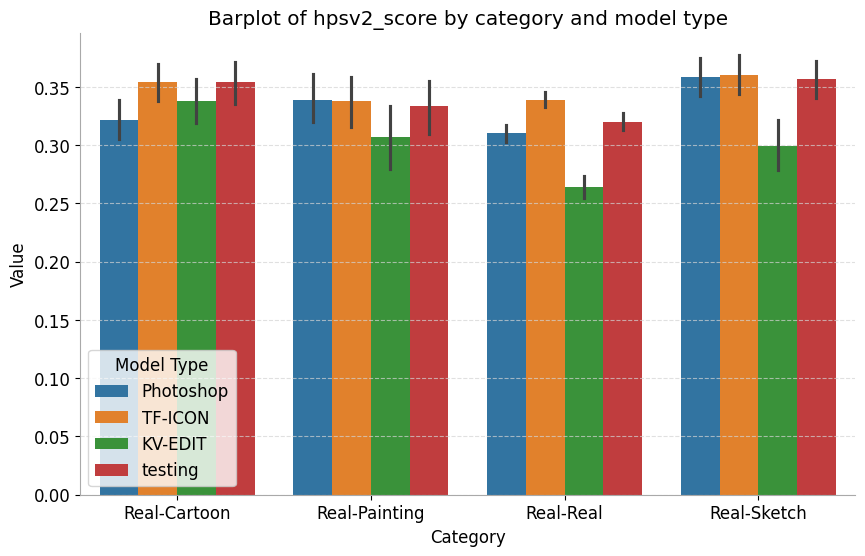

findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: 

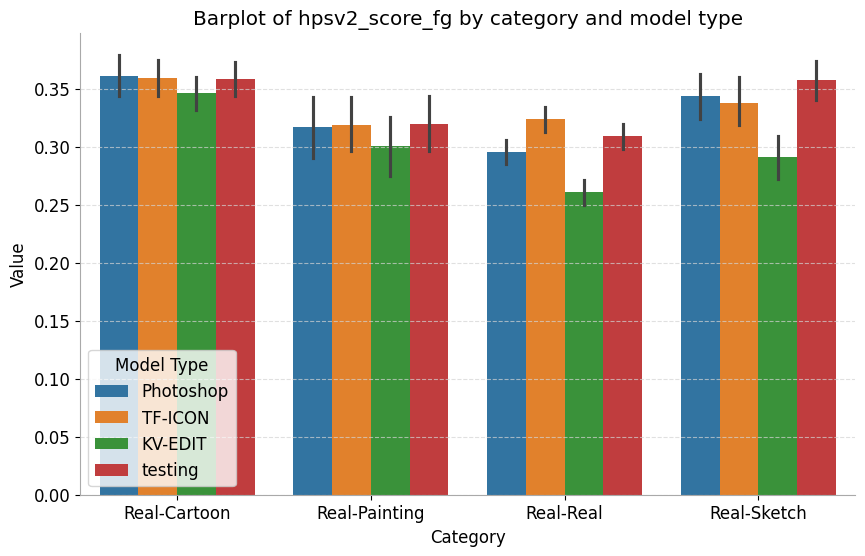

findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: 

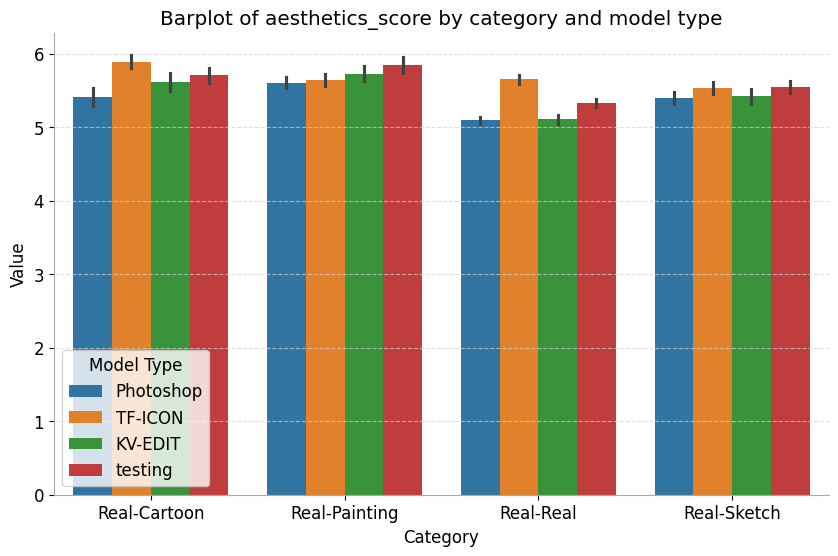

findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: 

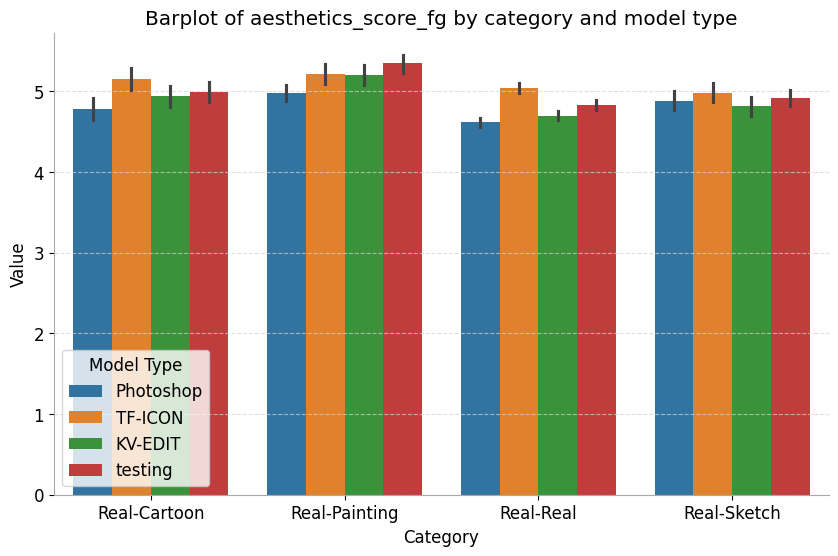

findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: 

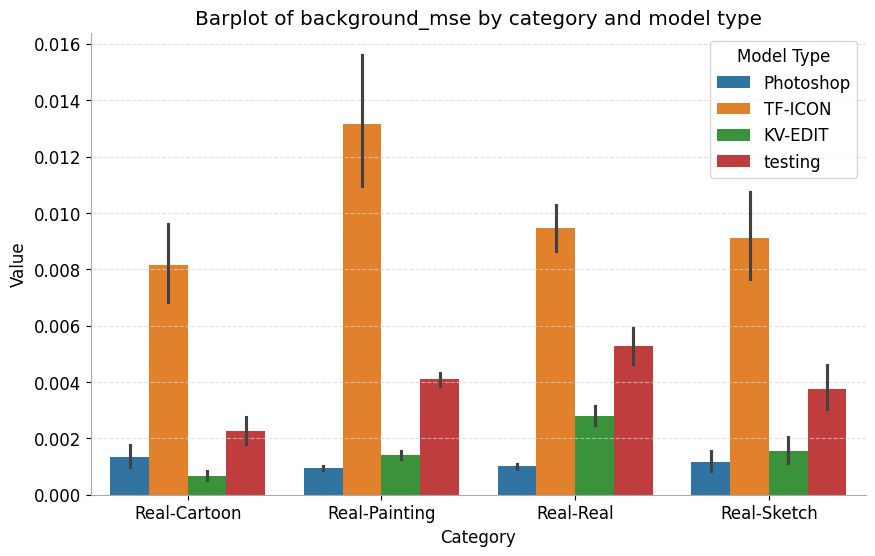

findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: 

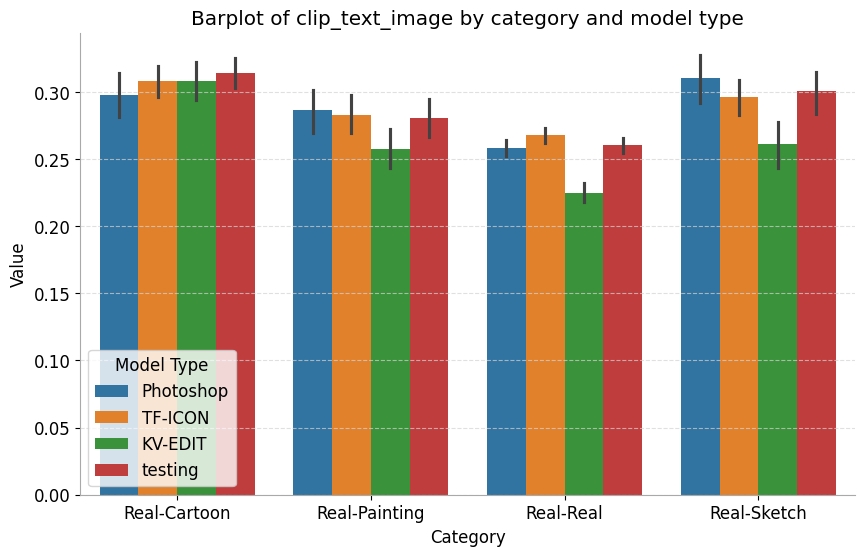

findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: 

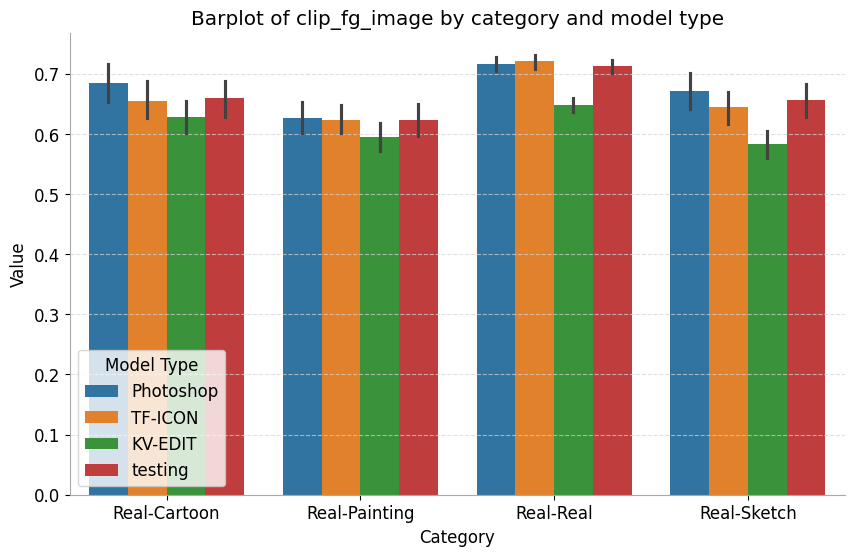

findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: 

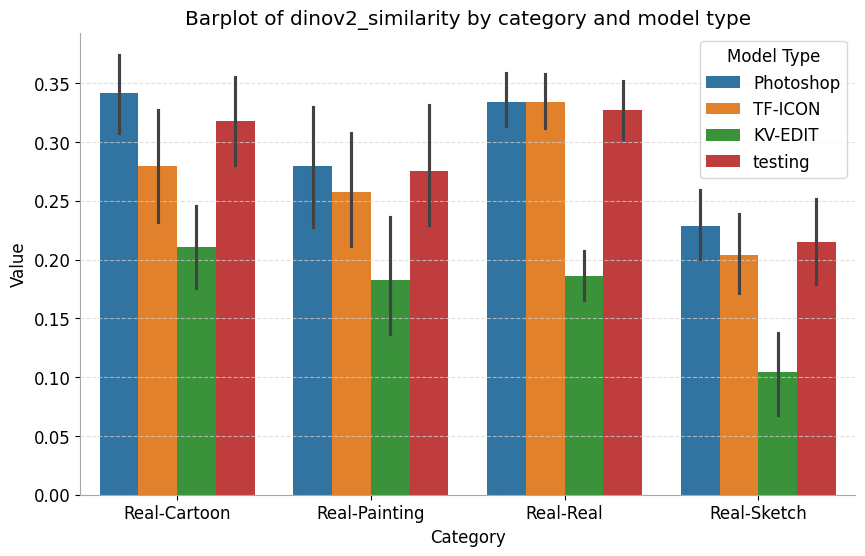

findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: Generic family 'serif' not found because none of the following families were found: cm10
findfont: 

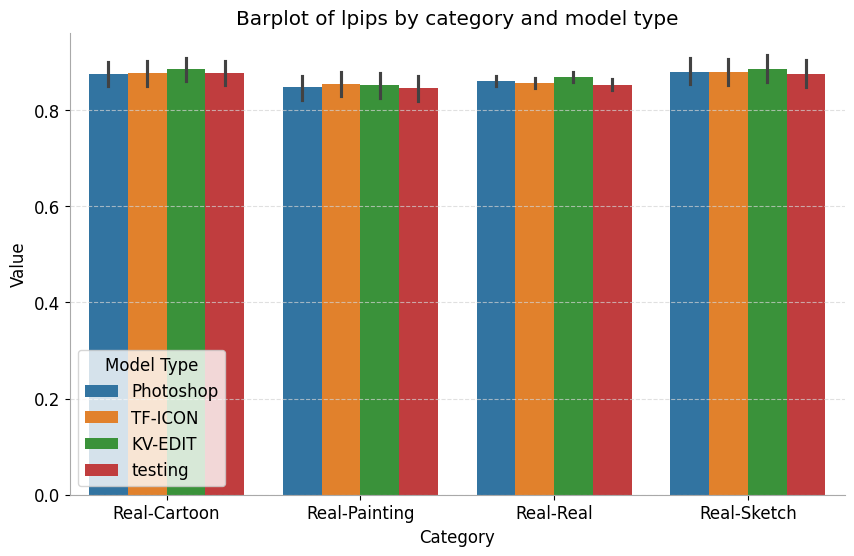

In [58]:
# Plot each metric separately
for metric in scores_flat['metric'].unique():
    plot_metric_chart(scores_flat, metric, type='barplot')

In [59]:
def create_comparison_grid(foreground, background, naive_result, tficon_result, kvedit_result, 
                          other_result1, other_result2, titles=None, save_path=None, figsize=(18, 10)):
    """
    Creates a publication-ready figure showing multiple image editing results side by side.
    
    Parameters:
    -----------
    foreground : PIL.Image or numpy.ndarray
        Foreground image already loaded
    background : PIL.Image or numpy.ndarray
        Background image already loaded
    naive_result : PIL.Image or numpy.ndarray
        Naive composite result already loaded
    tficon_result : PIL.Image or numpy.ndarray
        TF-ICON result already loaded
    kvedit_result : PIL.Image or numpy.ndarray
        KV-Edit result already loaded
    other_result1 : PIL.Image or numpy.ndarray
        First additional result already loaded
    other_result2 : PIL.Image or numpy.ndarray
        Second additional result already loaded
    titles : list, optional
        List of 7 titles for each subplot. If None, default titles are used.
    save_path : str, optional
        Path to save the figure. If None, figure is only displayed.
    figsize : tuple, optional
        Figure size in inches. Default is (18, 10).
        
    Returns:
    --------
    fig : matplotlib.figure.Figure
        The created figure
    """
    # Default titles if none provided
    if titles is None:
        titles = ['Foreground', 'Background', 'Naive Composite', 
                 'TF-ICON', 'KV-Edit', 'Method 1', 'Method 2']
    
    # Helper function to convert PIL Images to numpy arrays if needed
    def convert_image(img):
        if hasattr(img, 'convert'):  # Check if it's a PIL Image
            return np.array(img)
        return img  # Already a numpy array
    
    # Convert all images to numpy arrays if they are PIL Images
    images = [convert_image(img) for img in [foreground, background, naive_result, 
                                           tficon_result, kvedit_result, 
                                           other_result1, other_result2]]
    
    # Create figure
    fig, axes = plt.subplots(2, 4, figsize=figsize)
    axes = axes.flatten()
    
    # Hide the last subplot (since we only need 7)
    axes[-1].axis('off')
    
    # Plot images with titles
    for i, (img, title) in enumerate(zip(images, titles)):
        axes[i].imshow(img)
        axes[i].set_title(title, fontsize=14)
        axes[i].axis('off')
    
    # Add a main title with some context
    fig.suptitle('Comparison of Image Harmonization Methods', fontsize=16, y=0.98)
    
    # Add a subtle text description at the bottom
    fig.text(0.5, 0.02, 
             'Foreground object composited onto background using different harmonization techniques', 
             ha='center', fontsize=12, fontstyle='italic')
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.93, bottom=0.07)
    
    # Save if path provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', dpi=300)
        print(f"Figure saved to {save_path}")
    
    return fig